In [258]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 
import keras
from sklearn import datasets
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam  
from keras.utils.np_utils import to_categorical
import random

In [259]:
np.random.seed()

In [260]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [261]:
print(X_train.shape)
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000, 28, 28)
(60000,)


In [262]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28x28"
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28x28"




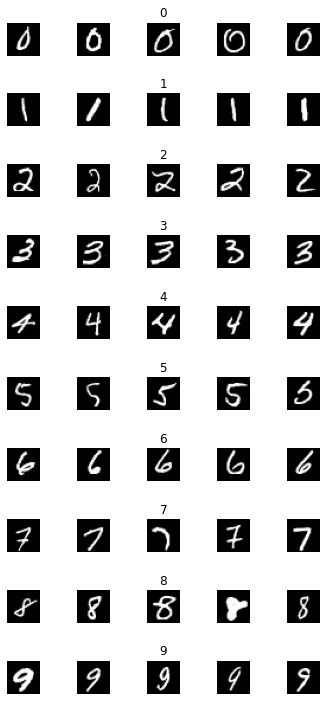

In [263]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
           axs[j][i].set_title(str(j))
           num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

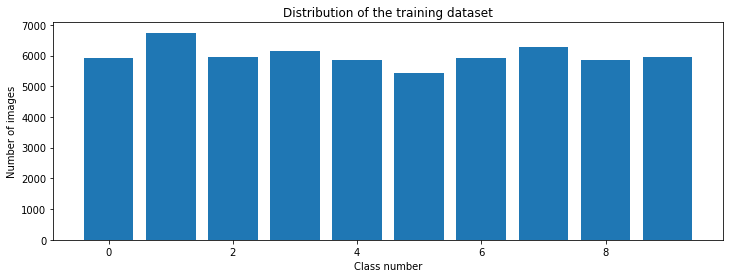

In [264]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [265]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [266]:
X_train = X_train/255
X_test = X_test/255

In [267]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)



In [268]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=num_pixels, activation ='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [269]:
model = create_model()
print(model.summary())

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 10)                7850      
                                                                 
 dense_52 (Dense)            (None, 30)                330       
                                                                 
 dense_53 (Dense)            (None, 10)                310       
                                                                 
 dense_54 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [270]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 3s 11ms/step - loss: 0.5881 - accuracy: 0.8126 - val_loss: 0.2641 - val_accuracy: 0.9227
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.3124 - accuracy: 0.9089 - val_loss: 0.2377 - val_accuracy: 0.9313
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2724 - accuracy: 0.9205 - val_loss: 0.2452 - val_accuracy: 0.9318
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2511 - accuracy: 0.9254 - val_loss: 0.2065 - val_accuracy: 0.9395
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2402 - accuracy: 0.9278 - val_loss: 0.2090 - val_accuracy: 0.9375
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2305 - accuracy: 0.9300 - val_loss: 0.2109 - val_accuracy: 0.9388
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2234 - accuracy: 0.9328 - val_loss: 0.2061 - val_accuracy: 0.9405
Epoch

Text(0.5, 0, 'epoch')

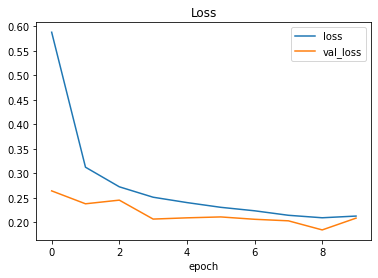

In [271]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

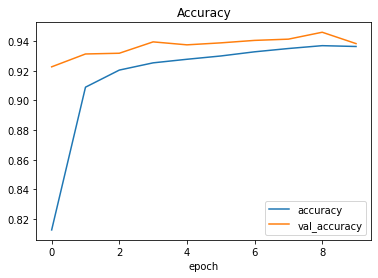

In [272]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [273]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.24315498769283295
Test accuracy: 0.9319000244140625


<Response [200]>


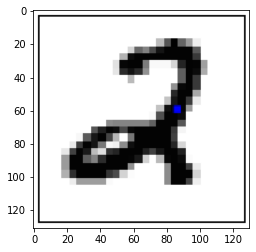

In [274]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)


In [ ]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(gray_scale, cmap=plt.get_cmap("gray"))
print(image)

In [276]:
image = image/255
image = image.reshape(1, 784)

In [277]:
prediction = np.argmax(model.predict(image), axis=-1)
print("Predicted digit:", str(prediction))

Predicted digit: [2]
